In [1]:
# 패키지 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### A. 데이터 전처리 - 데이터 읽어오기

In [16]:
# 데이터 읽어오기

csv_path = 'C:/Users/SSAFY/Desktop/관통PJT/PJT02/example/data/NFLX.CSV'

df = pd.read_csv(csv_path, usecols=range(0, 5) ,encoding='cp949')
df.head()

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Open    1009 non-null   float64
 2   High    1009 non-null   float64
 3   Low     1009 non-null   float64
 4   Close   1009 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.5+ KB


In [18]:
df.describe()

,Open,High,Low,Close
count,1009.000000,1009.000000,1009.000000,1009.000000
mean,419.059673,425.320703,412.374044,419.000733
std,108.537532,109.262960,107.555867,108.289999
min,233.919998,250.649994,231.229996,233.880005
25%,331.489990,336.299988,326.000000,331.619995
50%,377.769989,383.010010,370.880005,378.670013
75%,509.130005,515.630005,502.529999,509.079987
max,692.349976,700.989990,686.090027,691.690002


### B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

In [55]:
# 2021년 이후 데이터 필터링
df_after_2021 = df[df["Date"] >= "2021-01-01"]
df2021 = df_after_2021
print(df2021)

           Date        Open        High         Low       Close
733  2021-01-04  539.000000  540.799988  515.090027  522.859985
734  2021-01-05  521.549988  526.780029  515.890015  520.799988
735  2021-01-06  511.970001  513.099976  499.500000  500.489990
736  2021-01-07  508.279999  516.440002  506.420013  508.890015
737  2021-01-08  511.309998  513.239990  504.510010  510.399994
...         ...         ...         ...         ...         ...
1004 2022-01-31  401.970001  427.700012  398.200012  427.140015
1005 2022-02-01  432.959991  458.480011  425.540009  457.130005
1006 2022-02-02  448.250000  451.980011  426.480011  429.480011
1007 2022-02-03  421.440002  429.260010  404.279999  405.600006
1008 2022-02-04  407.309998  412.769989  396.640015  410.170013

[276 rows x 5 columns]


C:\Users\SSAFY\AppData\Local\Temp\ipykernel_6320\2465029421.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021["Date"] = pd.to_datetime(df2021["Date"])


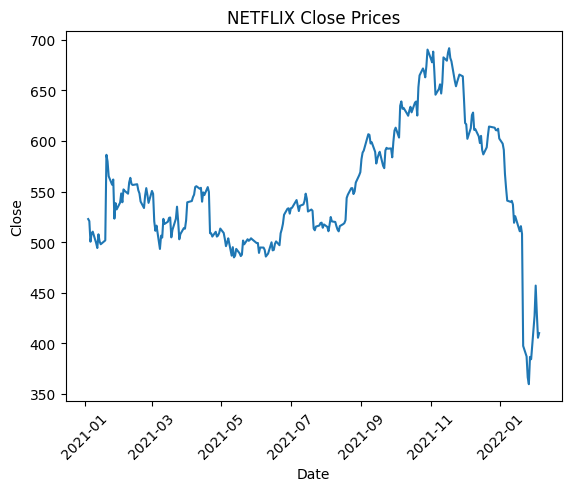

In [126]:
# 2021년 이후 종가 데이터 출력하기
df2021["Date"] = pd.to_datetime(df2021["Date"])
plt.plot(df2021['Date'], df2021['Close'])

# 그래프 설정
plt.title('NETFLIX Close Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.xticks(rotation=45)

# 그래프 표시
plt.show()



### C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [170]:
# 2021년 이후 최고, 최저 종가 출력하기

close2021 = df2021['Close']
print(f'최고 종가 : {close2021.max()}')
print(f'최저 종가 : {close2021.min()}')

최고 종가 : 691.690002
최저 종가 : 359.700012


### D. 데이터 분석 = 2021년 이후 월 별 평균 종가 출력하기

In [148]:
# 2021년 이후 월 별 평균 종가 데이터 프레임 생성

a = df2021.groupby(df2021['Date'].dt.to_period('M')).mean()
new_df = pd.DataFrame(a)
new_df

,Date,Open,High,Low,Close
Date,,,,,
2021-01,2021-01-16 10:06:18.947368448,530.531051,537.838944,519.854214,526.816845
2021-02,2021-02-13 10:06:18.947368448,547.777366,555.494205,540.621576,548.959999
2021-03,2021-03-15 15:39:07.826086912,519.429134,527.057390,511.326090,518.123482
2021-04,2021-04-16 17:08:34.285714176,532.810952,537.802858,527.041430,533.136662
2021-05,2021-05-15 12:00:00.000000000,496.923996,502.062502,491.996503,496.714497
2021-06,2021-06-15 07:38:10.909090816,503.470914,508.116364,498.675455,503.324091
2021-07,2021-07-16 13:42:51.428571392,528.609045,534.298567,522.618091,528.653330
2021-08,2021-08-15 22:54:32.727272704,529.884541,535.937267,526.222275,532.346817
2021-09,2021-09-16 03:25:42.857142784,589.405233,598.170003,583.384760,590.795239


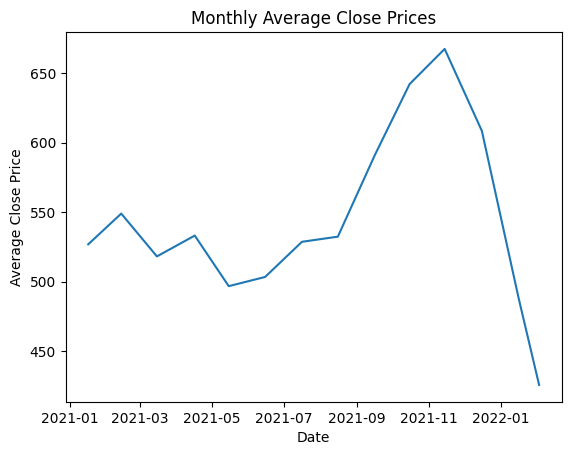

In [149]:
# 시각화
x = new_df['Date']
y = new_df['Close']
new_df["Date"] = pd.to_datetime(new_df["Date"])

plt.plot(x,y)

# 그래프 설정
plt.title('Monthly Average Close Prices')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
 
# plt.xticks(rotation=45)

# 그래프 표시
plt.show()

In [171]:
# # 2021년 이후 월 별 평균 종가 데이터 프레임 생성

# df_close_mean = df2021.groupby(df2021['Date'].dt.to_period('M'))['Close'].mean()
# df_Date_mean = df2021.groupby(df2021['Date'].dt.to_period('M'))['Date'].mean()

# # 시각화
# plt.plot(df_Date_mean,df_close_mean)

# # 그래프 설정
# plt.title('Monthly Average Close Prices')
# plt.xlabel('Date')
# plt.ylabel('Average Close Price')
 
# # plt.xticks(rotation=45)

# # 그래프 표시
# plt.show()


### E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화하기 

In [121]:
# 2022년 이후 데이터 필터링

df_after_2022 = df[df["Date"] >= "2022-01-01"]
df2022 = df_after_2022
df2022

,Date,Open,High,Low,Close
985,2022-01-03,605.609985,609.989990,590.559998,597.369995
986,2022-01-04,599.909973,600.409973,581.599976,591.150024
987,2022-01-05,592.000000,592.840027,566.880005,567.520020
988,2022-01-06,554.340027,563.359985,542.010010,553.289978
989,2022-01-07,549.460022,553.429993,538.219971,541.059998
990,2022-01-10,538.489990,543.690002,526.320007,539.849976
991,2022-01-11,536.989990,543.909973,530.070007,540.840027
992,2022-01-12,544.270020,544.270020,532.020020,537.219971
993,2022-01-13,537.059998,540.789978,518.260010,519.200012
994,2022-01-14,517.599976,538.369995,511.880005,525.690002


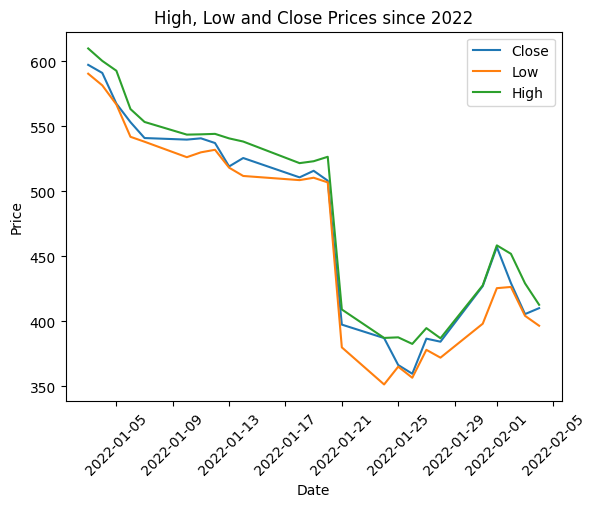

In [172]:
# 그래프 그리기
plt.plot(df2022['Date'], df2022['Close'], label='Close')
plt.plot(df2022['Date'], df2022['Low'], label='Low')
plt.plot(df2022['Date'], df2022['High'], label='High')

# 그래프 제목 설정
plt.title('High, Low and Close Prices since 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')
plt.xticks(rotation = 45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()